<a href="https://colab.research.google.com/github/jeffheaton/app_generative_ai/blob/main/t81_559_class_09_3_dalle_existing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# T81-559: Applications of Generative Artificial Intelligence
**Module 9: MultiModal and Text to Image Models**
* Instructor: [Jeff Heaton](https://sites.wustl.edu/jeffheaton/), McKelvey School of Engineering, [Washington University in St. Louis](https://engineering.wustl.edu/Programs/Pages/default.aspx)
* For more information visit the [class website](https://sites.wustl.edu/jeffheaton/t81-558/).

# Module 9 Material

Module 9: MultiModal and Text to Image

* Part 9.1: Introduction to MultiModal and Text to Image [[Video]]() [[Notebook]](t81_559_class_09_1_image_genai.ipynb)
* Part 9.2: Generating Images with DALL·E Kaggle Notebooks [[Video]]() [[Notebook]](t81_559_class_09_2_dalle.ipynb)
* **Part 8.3: DALL·E Existing Images** [[Video]]() [[Notebook]](t81_559_class_09_3_dalle_existing.ipynb)
* Part 8.4: MultiModal Models [[Video]]() [[Notebook]](t81_559_class_09_4_multimodal.ipynb)
* Part 8.5: Illustrated Book [[Video]]() [[Notebook]](t81_559_class_09_5_illustrated_book.ipynb)

# Google CoLab Instructions
The following code ensures that Google CoLab is running and maps Google Drive if needed.

In [1]:
import os

try:
    from google.colab import drive, userdata
    COLAB = True
    print("Note: using Google CoLab")
except:
    print("Note: not using Google CoLab")
    COLAB = False

# OpenAI Secrets
if COLAB:
    os.environ["OPENAI_API_KEY"] = userdata.get('OPENAI_API_KEY')

# Install needed libraries in CoLab
if COLAB:
    !pip install langchain openai

Note: using Google CoLab
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 353.7 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 373.5/373.5 kB 16.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.9/318.9 kB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 396.4/396.4 kB 21.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.5/290.5 kB 16.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 2.7 MB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing installation: tenacity 9.0.0
    Uninstalling tenacity-9.0.0:
      Successfully uninstalled tenacity-9.0.0


# Part 8.3: DALL·E Existing Images





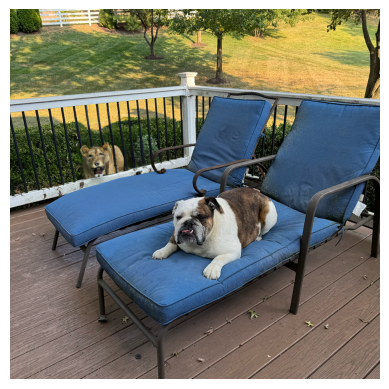

In [2]:
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt
from openai import OpenAI

client = OpenAI()

# Function to download and load an image from a URL
def load_image_from_url(url):
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    return img

# URLs for the images
image_url_1 = "https://s3.amazonaws.com/data.heatonresearch.com/images/wustl/app_genai/hickory_deck_1.png"
image_url_2 = "https://s3.amazonaws.com/data.heatonresearch.com/images/wustl/app_genai/hickory_deck_2.png"

# Load the images from URLs
image_1 = load_image_from_url(image_url_1)
image_2 = load_image_from_url(image_url_2)

# Save the images to in-memory files
img_byte_array_1 = BytesIO()
img_byte_array_2 = BytesIO()
image_1.save(img_byte_array_1, format='PNG')
image_2.save(img_byte_array_2, format='PNG')

# Reset the buffer's position to the start
img_byte_array_1.seek(0)
img_byte_array_2.seek(0)

# Use the OpenAI API to edit the images with in-memory files
response = client.images.edit(
  image=img_byte_array_1,
  mask=img_byte_array_2,
  prompt="lion",
  n=2,
  size="1024x1024"
)

# Access the first image URL from the response
edited_image_url = response.data[0].url

# Download the edited image from the URL
edited_image_response = requests.get(edited_image_url)
resulting_image = Image.open(BytesIO(edited_image_response.content))

# Display the resulting image using matplotlib
plt.imshow(resulting_image)
plt.axis('off')  # Hide the axes
plt.show()


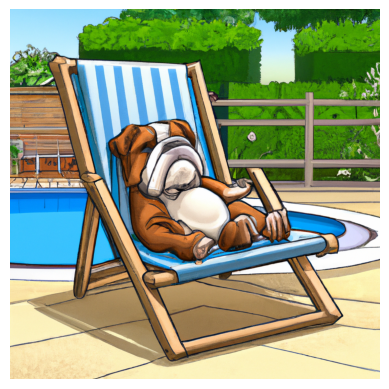

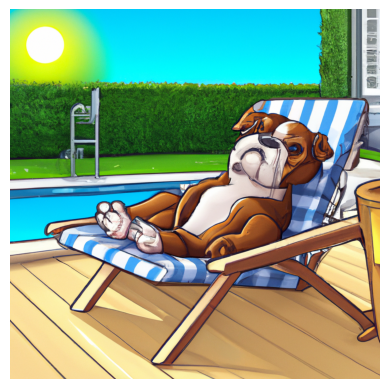

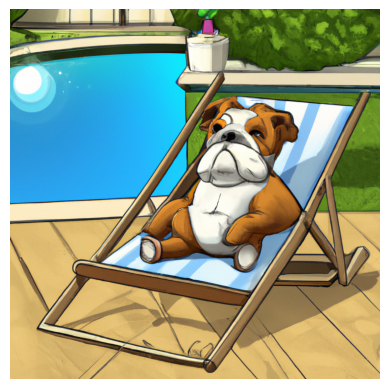

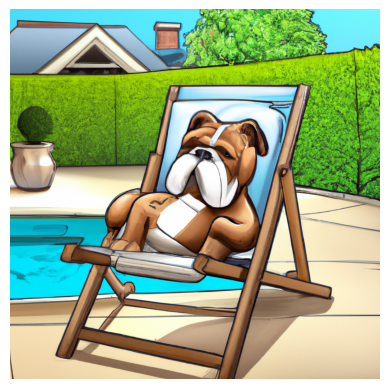

In [3]:
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt
from openai import OpenAI

client = OpenAI()

# Function to display the image using matplotlib
def display_image(image):
    plt.imshow(image)
    plt.axis('off')  # Hide the axes for a cleaner view
    plt.show()

# Function to download the image from a URL and convert it to a file-like object
def load_image_from_url(url):
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))

    # Save the image to an in-memory file
    img_byte_array = BytesIO()
    img.save(img_byte_array, format='PNG')

    # Reset the buffer's position to the start
    img_byte_array.seek(0)
    return img_byte_array

# URL of the image to use
image_url = "https://data.heatonresearch.com/images/wustl/app_genai/hickory_cartoon.jpg"

# Load the image from the URL
image_from_url = load_image_from_url(image_url)

# Create variations of the image using the OpenAI API
response = client.images.create_variation(
    image=image_from_url,
    n=4,
    size="1024x1024"
)

# Loop through the generated image variations and display/save them
for i, data in enumerate(response.data):
    # Get the image URL
    variation_image_url = data.url

    # Fetch the image from the URL
    variation_image_response = requests.get(variation_image_url)
    variation_image = Image.open(BytesIO(variation_image_response.content))

    # Display the image using matplotlib
    display_image(variation_image)

    # Optionally save the variation image to disk
    variation_image.save(f"variation_image_{i+1}.png", "PNG")


In [4]:
from google.colab import files

# Download the image saved as variation_image_1.png
files.download('variation_image_1.png')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>